In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output


print(check_output(["ls", "./"]).decode("utf8"))

Untitled.ipynb
Untitled1.ipynb
hw1
hw2
iris.data



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical

dataset = pd.read_csv('./iris.data')

dataset

Using TensorFlow backend.


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [3]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:4].values
y = dataset.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.fit_transform(X_test)

In [4]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

# model.add(Dense(10,input_shape=(4,),activation='tanh'))
# model.add(Dense(8,activation='tanh'))
# model.add(Dense(6,activation='tanh'))
model.add(Dense(3,input_shape=(3,),activation='softmax'))

# small weight
# weight1 = np.zeros((3, 3))
# weight2 = np.zeros(3)

# larget weight
weight1 = np.full((3, 3), 65536)
weight2 = np.full((3), 65536)

weight = [weight1, weight2]
model.set_weights(weight)

# model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [5]:
#fitting the model and predicting 
history = model.fit(X_train,y_train,epochs=150, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Train on 119 samples, validate on 30 samples
Epoch 1/150
119/119 [==============================] - 0s 3ms/step - loss: 1.0986 - acc: 0.3109 - val_loss: 1.0986 - val_acc: 0.4000
Epoch 2/150
119/119 [==============================] - 0s 100us/step - loss: 1.0986 - acc: 0.3109 - val_loss: 1.0986 - val_acc: 0.4000
Epoch 3/150
119/119 [==============================] - 0s 133us/step - loss: 1.0986 - acc: 0.3109 - val_loss: 1.0986 - val_acc: 0.4000
Epoch 4/150
119/119 [==============================] - 0s 131us/step - loss: 1.0986 - acc: 0.3109 - val_loss: 1.0986 - val_acc: 0.4000
Epoch 5/150
119/119 [==============================] - 0s 185us/step - loss: 1.0986 - acc: 0.3109 - val_loss: 1.0986 - val_acc: 0.4000
Epoch 6/150
119/119 [==============================] - 0s 163us/step - loss: 1.0986 - acc: 0.3109 - val_loss: 1.0986 - val_acc: 0.4000
Epoch 7/150
119/119 [==============================] - 0s 219us/step - loss: 1.0986 - acc: 0.3109 - val_loss: 1.0986 - val_acc: 0.4000
Epoch 8/150


Epoch 61/150
119/119 [==============================] - 0s 117us/step - loss: 1.0970 - acc: 0.3866 - val_loss: 1.0980 - val_acc: 0.3000
Epoch 62/150
119/119 [==============================] - 0s 115us/step - loss: 1.0970 - acc: 0.3866 - val_loss: 1.0980 - val_acc: 0.3000
Epoch 63/150
119/119 [==============================] - 0s 133us/step - loss: 1.0970 - acc: 0.3866 - val_loss: 1.0980 - val_acc: 0.3000
Epoch 64/150
119/119 [==============================] - 0s 145us/step - loss: 1.0970 - acc: 0.3866 - val_loss: 1.0980 - val_acc: 0.3000
Epoch 65/150
119/119 [==============================] - 0s 127us/step - loss: 1.0970 - acc: 0.3866 - val_loss: 1.0980 - val_acc: 0.3000
Epoch 66/150
119/119 [==============================] - 0s 126us/step - loss: 1.0970 - acc: 0.3866 - val_loss: 1.0980 - val_acc: 0.3000
Epoch 67/150
119/119 [==============================] - 0s 134us/step - loss: 1.0970 - acc: 0.3866 - val_loss: 1.0980 - val_acc: 0.3000
Epoch 68/150
119/119 [==========================

119/119 [==============================] - 0s 121us/step - loss: 1.0954 - acc: 0.3361 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 122/150
119/119 [==============================] - 0s 111us/step - loss: 1.0954 - acc: 0.3361 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 123/150
119/119 [==============================] - 0s 121us/step - loss: 1.0954 - acc: 0.3361 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 124/150
119/119 [==============================] - 0s 122us/step - loss: 1.0954 - acc: 0.3361 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 125/150
119/119 [==============================] - 0s 139us/step - loss: 1.0954 - acc: 0.3361 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 126/150
119/119 [==============================] - 0s 136us/step - loss: 1.0954 - acc: 0.3361 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 127/150
119/119 [==============================] - 0s 136us/step - loss: 1.0954 - acc: 0.3361 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 128/150
119/119 [==============================] 

In [6]:
model.get_weights()[1].shape

(3,)

In [7]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.33      1.00      0.50        10
           2       0.00      0.00      0.00         8

   micro avg       0.33      0.33      0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30

[[ 0 12  0]
 [ 0 10  0]
 [ 0  8  0]]


/Users/haydenwang/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


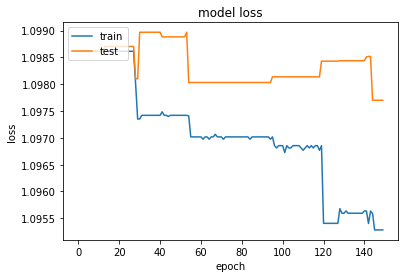

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()